In [1]:
!pip install torch torchvision tqdm
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
from torchvision.models import resnet18

In [2]:
transform = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
import numpy as np
train_X = []
train_Y=[]
for image,label in trainset:
  if(sum(np.asarray(train_Y)==label)<500):
    train_X.append(image)
    train_Y.append(label)
test_X = []
test_Y=[]
for image,label in testset:
  if(sum(np.asarray(test_Y)==label)<100):
    test_X.append(image)
    test_Y.append(label)
i=0
train_images=[]
train_labels=[]
while(i<len(train_X)):
  temp_im=[]
  temp_labels=[]
  for j in range(4):
    temp_im.append(train_X[i])
    temp_labels.append(train_Y[i])
    i=i+1
  train_images.append(temp_im)
  train_labels.append(temp_labels)
i=0
test_images=[]
test_labels=[]
while(i<len(test_X)):
  temp_im=[]
  temp_labels=[]
  for j in range(4):
    temp_im.append(test_X[i])
    temp_labels.append(test_Y[i])
    i=i+1
  test_images.append(temp_im)
  test_labels.append(temp_labels)
  



In [0]:
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')
def train(epoch, train_images, train_labels, optimizer, criterion):
    running_loss = 0.0
    for i in range(len(train_labels)):#enumerate(tqdm(trainloader), 0):
        # get the inputs
        inputs=torch.stack(train_images[i])
        labels=torch.tensor(np.asarray(train_labels[i]))
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

    print('epoch %d training loss: %.3f' %
            (epoch + 1, running_loss / len(train_labels)))
    
def test(test_images, test_labels, model):
    correct = 0
    total = 0
    with torch.no_grad():
        for i in range(len(test_labels)):#tqdm(testloader)
            images=torch.stack(test_images[i])
            labels=torch.tensor(np.asarray(test_labels[i]))
            if torch.cuda.is_available():
                images, labels = images.cuda(), labels.cuda()        
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            #print(predicted,labels)

    print(correct,total)
    print('Accuracy of the network on the 1000 test images: %d %%' % (
                                    100 * correct / total))
    
def classwise_test(test_images, test_labels, model):
########################################################################
# class-wise accuracy

    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for i in range(len(test_labels)):#tqdm(testloader):
            images=torch.stack(test_images[i])
            labels=torch.tensor(np.asarray(test_labels[i]))
            if torch.cuda.is_available():
                images, labels = images.cuda(), labels.cuda()        
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            #print(c)
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    for i in range(10):
        #print(class_correct[i],class_total[i])
        print('Accuracy of %5s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
model = resnet18(num_classes=10)
num_epochs = 30
learning_rate = 0.005
# transfer the model to GPU
if torch.cuda.is_available():
    model = model.cuda()
    print("Using GPU")
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0001)
for epoch in range(num_epochs):  # loop over the dataset multiple times
    print('epoch ', epoch + 1)
    train(epoch, train_images, train_labels, optimizer, criterion)
    test(test_images, test_labels, model)
    classwise_test(test_images, test_labels, model)
    #torch.save(model.state_dict(), './models/model-'+str(epoch)+'.pth')

print('Finished Training')

Using GPU
epoch  1
epoch 1 training loss: 2.274
112 1000
Accuracy of the network on the 1000 test images: 11 %
Accuracy of plane :  0 %
Accuracy of   car : 100 %
Accuracy of  bird :  0 %
Accuracy of   cat :  0 %
Accuracy of  deer :  0 %
Accuracy of   dog : 12 %
Accuracy of  frog :  0 %
Accuracy of horse :  0 %
Accuracy of  ship :  0 %
Accuracy of truck :  0 %
epoch  2
epoch 2 training loss: 1.956
154 1000
Accuracy of the network on the 1000 test images: 15 %
Accuracy of plane :  2 %
Accuracy of   car : 100 %
Accuracy of  bird :  0 %
Accuracy of   cat :  3 %
Accuracy of  deer :  0 %
Accuracy of   dog : 38 %
Accuracy of  frog :  0 %
Accuracy of horse : 11 %
Accuracy of  ship :  0 %
Accuracy of truck :  0 %
epoch  3
epoch 3 training loss: 1.789
177 1000
Accuracy of the network on the 1000 test images: 17 %
Accuracy of plane :  8 %
Accuracy of   car : 100 %
Accuracy of  bird :  0 %
Accuracy of   cat :  7 %
Accuracy of  deer :  0 %
Accuracy of   dog : 33 %
Accuracy of  frog :  0 %
Accuracy 

In [0]:
testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=False, num_workers=2)
def testfull(testloader, model):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:#tqdm(testloader)
            images, labels = data
            if torch.cuda.is_available():
                images, labels = images.cuda(), labels.cuda()        
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
                                    100 * correct / total))
    
def classwise_testfull(testloader, model):
########################################################################
# class-wise accuracy

    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:#tqdm(testloader):
            images, labels = data
            if torch.cuda.is_available():
                images, labels = images.cuda(), labels.cuda()        
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    for i in range(10):
        print('Accuracy of %5s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))


In [9]:
testfull(testloader, model)
classwise_testfull(testloader, model)

Accuracy of the network on the 10000 test images: 56 %
Accuracy of plane : 60 %
Accuracy of   car : 74 %
Accuracy of  bird : 39 %
Accuracy of   cat : 35 %
Accuracy of  deer : 44 %
Accuracy of   dog : 44 %
Accuracy of  frog : 63 %
Accuracy of horse : 62 %
Accuracy of  ship : 70 %
Accuracy of truck : 67 %


In [0]:
#Load imagenet pretrained model
import torch.utils.model_zoo as model_zoo
model_url = 'https://download.pytorch.org/models/resnet18-5c106cde.pth'
#model.load_state_dict(model_zoo.load_url(model_url))
a = model_zoo.load_url(model_url)
del a['fc.weight']
del a['fc.bias']
import numpy as np
b = np.random.uniform(-1,1,(10,512))
b = torch.from_numpy(b)
a.update({'fc.weight':b})
b = np.random.uniform(-1,1,10)
b = torch.from_numpy(b)
a.update({'fc.bias':b})
a['fc.bias'] = torch.tensor(a['fc.bias'], requires_grad=True)
a['fc.weight'] = torch.tensor(a['fc.weight'], requires_grad=True)
model.load_state_dict(a)


In [11]:
num_epochs = 10
learning_rate = 0.0001
# transfer the model to GPU
if torch.cuda.is_available():
    model = model.cuda()
    print("Using GPU")

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0001)
for epoch in range(num_epochs):  # loop over the dataset multiple times
    print('epoch ', epoch + 1)
    train(epoch, train_images, train_labels, optimizer, criterion)
    test(test_images, test_labels, model)
    classwise_test(test_images, test_labels, model)
    #torch.save(model.state_dict(), './models/model-'+str(epoch)+'.pth')

print('Finished Training')

Using GPU
epoch  1
epoch 1 training loss: 4.786
377 1000
Accuracy of the network on the 1000 test images: 37 %
Accuracy of plane : 32 %
Accuracy of   car : 95 %
Accuracy of  bird :  4 %
Accuracy of   cat : 51 %
Accuracy of  deer :  1 %
Accuracy of   dog : 53 %
Accuracy of  frog : 22 %
Accuracy of horse : 76 %
Accuracy of  ship : 14 %
Accuracy of truck : 29 %
epoch  2
epoch 2 training loss: 0.802
514 1000
Accuracy of the network on the 1000 test images: 51 %
Accuracy of plane : 45 %
Accuracy of   car : 96 %
Accuracy of  bird : 29 %
Accuracy of   cat : 52 %
Accuracy of  deer : 13 %
Accuracy of   dog : 64 %
Accuracy of  frog : 34 %
Accuracy of horse : 86 %
Accuracy of  ship : 49 %
Accuracy of truck : 46 %
epoch  3
epoch 3 training loss: 0.274
582 1000
Accuracy of the network on the 1000 test images: 58 %
Accuracy of plane : 51 %
Accuracy of   car : 97 %
Accuracy of  bird : 42 %
Accuracy of   cat : 54 %
Accuracy of  deer : 29 %
Accuracy of   dog : 63 %
Accuracy of  frog : 52 %
Accuracy of 

In [12]:
testfull(testloader, model)
classwise_testfull(testloader, model)

Accuracy of the network on the 10000 test images: 64 %
Accuracy of plane : 67 %
Accuracy of   car : 79 %
Accuracy of  bird : 57 %
Accuracy of   cat : 44 %
Accuracy of  deer : 55 %
Accuracy of   dog : 56 %
Accuracy of  frog : 68 %
Accuracy of horse : 70 %
Accuracy of  ship : 70 %
Accuracy of truck : 75 %


In [13]:
a = model_zoo.load_url(model_url)
del a['fc.weight']
del a['fc.bias']
b = np.random.uniform(-1,1,(10,512))
b = torch.from_numpy(b)
a.update({'fc.weight':b})
b = np.random.uniform(-1,1,10)
b = torch.from_numpy(b)
a.update({'fc.bias':b})
for k in a:
  a[k] = torch.tensor(a[k], requires_grad=False)
a['fc.bias'] = torch.tensor(a['fc.bias'], requires_grad=True)
a['fc.weight'] = torch.tensor(a['fc.weight'], requires_grad=True)
model.load_state_dict(a)
num_epochs = 6
learning_rate = 0.00001
# transfer the model to GPU
if torch.cuda.is_available():
    model = model.cuda()
    print("Using GPU")

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0001)
for epoch in range(num_epochs):  # loop over the dataset multiple times
    print('epoch ', epoch + 1)
    train(epoch, train_images, train_labels, optimizer, criterion)
    test(test_images, test_labels, model)
    classwise_test(test_images, test_labels, model)
    #torch.save(model.state_dict(), './models/model-'+str(epoch)+'.pth')

print('Finished Training')

Using GPU
epoch  1
epoch 1 training loss: 6.290
510 1000
Accuracy of the network on the 1000 test images: 51 %
Accuracy of plane : 48 %
Accuracy of   car : 63 %
Accuracy of  bird : 40 %
Accuracy of   cat : 47 %
Accuracy of  deer : 32 %
Accuracy of   dog : 64 %
Accuracy of  frog : 50 %
Accuracy of horse : 53 %
Accuracy of  ship : 50 %
Accuracy of truck : 63 %
epoch  2
epoch 2 training loss: 2.070
571 1000
Accuracy of the network on the 1000 test images: 57 %
Accuracy of plane : 50 %
Accuracy of   car : 75 %
Accuracy of  bird : 44 %
Accuracy of   cat : 52 %
Accuracy of  deer : 48 %
Accuracy of   dog : 60 %
Accuracy of  frog : 59 %
Accuracy of horse : 62 %
Accuracy of  ship : 56 %
Accuracy of truck : 65 %
epoch  3
epoch 3 training loss: 0.643
575 1000
Accuracy of the network on the 1000 test images: 57 %
Accuracy of plane : 47 %
Accuracy of   car : 73 %
Accuracy of  bird : 46 %
Accuracy of   cat : 53 %
Accuracy of  deer : 47 %
Accuracy of   dog : 60 %
Accuracy of  frog : 58 %
Accuracy of 

In [14]:
testfull(testloader, model)
classwise_testfull(testloader, model)

Accuracy of the network on the 10000 test images: 60 %
Accuracy of plane : 64 %
Accuracy of   car : 74 %
Accuracy of  bird : 49 %
Accuracy of   cat : 43 %
Accuracy of  deer : 53 %
Accuracy of   dog : 58 %
Accuracy of  frog : 65 %
Accuracy of horse : 64 %
Accuracy of  ship : 67 %
Accuracy of truck : 68 %


Training error: training from scratch


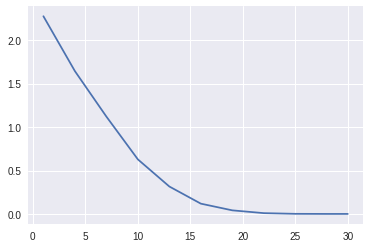

Test accuracy: training from scratch


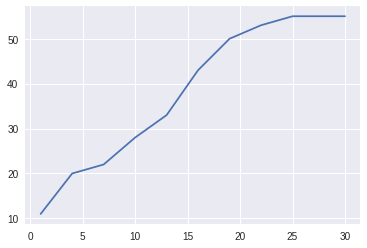

Training error: pretrained method 1


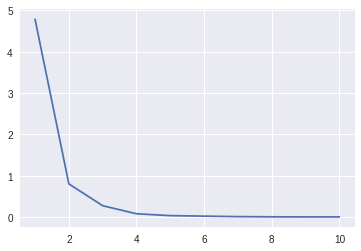

Test accuracy: pretrained method 1


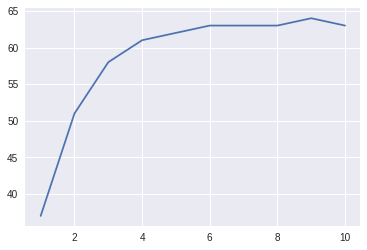

Training error: pretrained method 2


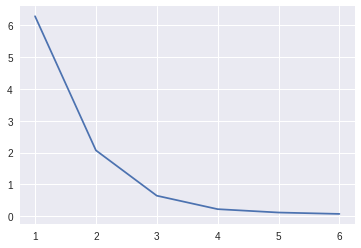

Test accuracy: pretrained method 2


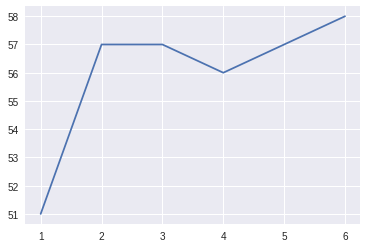

In [16]:
xaxis = np.array([1,4,7,10,13,16,19,22,25,28,30])
print("Training error: training from scratch")
plt.figure()
y = np.array([2.274,1.643,1.120,0.628,0.316,0.119,0.042,0.010,0.002,0.001,0.001])
plt.plot(xaxis,y)
plt.show()
print("Test accuracy: training from scratch")
plt.figure()
y = np.array([11,20,22,28,33,43,50,53,55,55,55])
plt.plot(xaxis,y)
plt.show()

xaxis = np.array([1,2,3,4,5,6,7,8,9,10])
print("Training error: pretrained method 1")
plt.figure()
y = np.array([4.786,0.802,0.274,0.079,0.034,0.022,0.010,0.005,0.003,0.003])
plt.plot(xaxis,y)
plt.show()
print("Test accuracy: pretrained method 1")
plt.figure()
y = np.array([37,51,58,61,62,63,63,63,64,63])
plt.plot(xaxis,y)
plt.show()

xaxis = np.array([1,2,3,4,5,6])
print("Training error: pretrained method 2")
plt.figure()
y = np.array([6.290,2.070,0.643,0.220,0.114,0.070])
plt.plot(xaxis,y)
plt.show()
print("Test accuracy: pretrained method 2")
plt.figure()
y = np.array([51,57,57,56,57,58])
plt.plot(xaxis,y)
plt.show()